# Pymaceuticals Inc.
---

### Analysis

- Based on our calculation of outliers, it seems as if there aren't many outliers in the data, as the one outlier that was found among the four tested drugs was only .5 outside of the lower bound.
- Based on our scatter plot, unsurprisingly, heavier mice develop larger tumors than smaller mice.
- Based on our table of drug regimen vs mean tumor volume, Capomulin and Ramicane have a much greater effect on tumor volume than any other drugs, both displaying an average tumor size 11mm3 smaller than the next lowest average
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()



249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = combined_df[combined_df.duplicated(["Mouse ID","Timepoint"])]
duplicateMice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df["Mouse ID"] == "g989", :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = pd.DataFrame(combined_df)
cleaned_df.drop(cleaned_df[cleaned_df['Mouse ID'] == "g989"].index, inplace = True)
cleaned_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_df = cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]]
summary_df = grouped_df.groupby(["Drug Regimen"]).mean()
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
summary_df["Median Tumor Volume"] = grouped_df.groupby(["Drug Regimen"]).median()
summary_df["Tumor Volume Variance"] = grouped_df.groupby(["Drug Regimen"]).var()
summary_df["Tumor Volume Std. Dev."] = grouped_df.groupby(["Drug Regimen"]).std()
summary_df["Tumor Volume Std. Err."] = grouped_df.groupby(["Drug Regimen"]).sem()
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
aggregated_df = grouped_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
aggregated_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

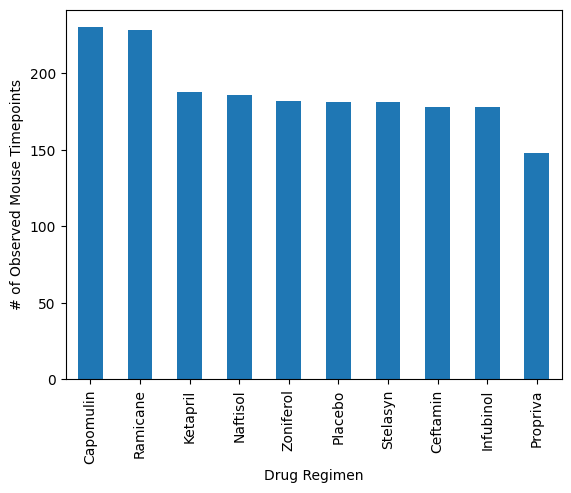

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
miceCount = cleaned_df[["Drug Regimen","Timepoint"]]
miceCount = miceCount.groupby(["Drug Regimen"]).count().sort_values("Timepoint",ascending=False)
miceCount.plot(kind="bar",ylabel="# of Observed Mouse Timepoints",legend=False)
plt.show()

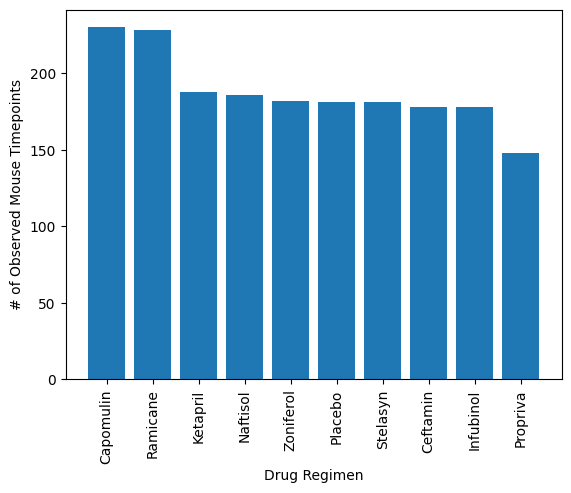

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(miceCount.index,miceCount["Timepoint"])
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.show()

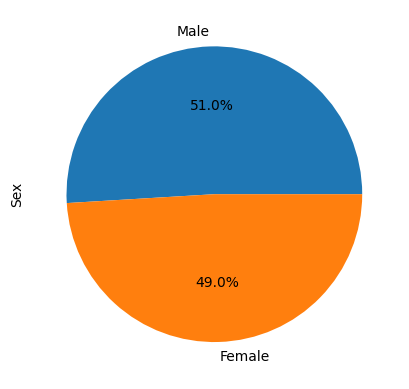

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
miceGender = cleaned_df["Sex"].value_counts()
miceGender.plot(kind="pie",ylabel="Sex",autopct = "%1.1f%%")
plt.show()

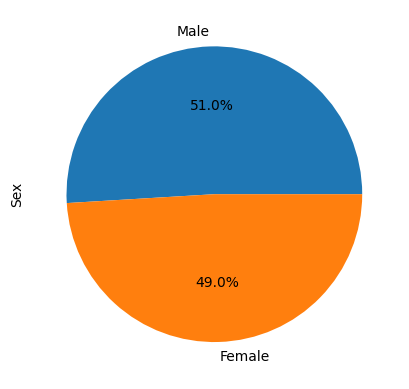

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(miceGender,labels=miceGender.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
box_df = cleaned_df[["Mouse ID","Timepoint"]]
box_df = box_df.groupby(["Mouse ID"]).max()
box_df = box_df.merge(cleaned_df, how="left",on=["Mouse ID","Timepoint"])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
box_df = box_df.reset_index(drop = True)
box_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  # Locate the rows which contain mice on each drug and get the tumor volumes
i=0
for treatment in treatments:
                       
    # add subset 
  tumorData.append(box_df.loc[box_df["Drug Regimen"]==treatment,"Tumor Volume (mm3)"],)
    
    # Determine outliers using upper and lower bounds
  quartiles = tumorData[i].quantile([.25,.75])
  iqr = quartiles[.75]-quartiles[.25]
  lowerBound =(quartiles[.25] - (1.5*iqr))
  upperBound =(quartiles[.75] + (1.5*iqr))

  outlierl = [num for num in tumorData[i] if num < lowerBound]
  outlieru= [num for num in tumorData[i] if num > upperBound]
  
  print(f"Values for {treatment} below {lowerBound:.2f} or above {upperBound:.2f} may be outliers, IQR is {iqr:.2f}")
  print(f"Potential lower bound outlier(s) at {outlierl}, upper bound outlier(s) at {outlieru}")
  i+=1


Values for Capomulin below 20.70 or above 51.83 may be outliers, IQR is 7.78
Potential lower bound outlier(s) at [], upper bound outlier(s) at []
Values for Ramicane below 17.91 or above 54.31 may be outliers, IQR is 9.10
Potential lower bound outlier(s) at [], upper bound outlier(s) at []
Values for Infubinol below 36.83 or above 82.74 may be outliers, IQR is 11.48
Potential lower bound outlier(s) at [36.3213458], upper bound outlier(s) at []
Values for Ceftamin below 25.36 or above 87.67 may be outliers, IQR is 15.58
Potential lower bound outlier(s) at [], upper bound outlier(s) at []


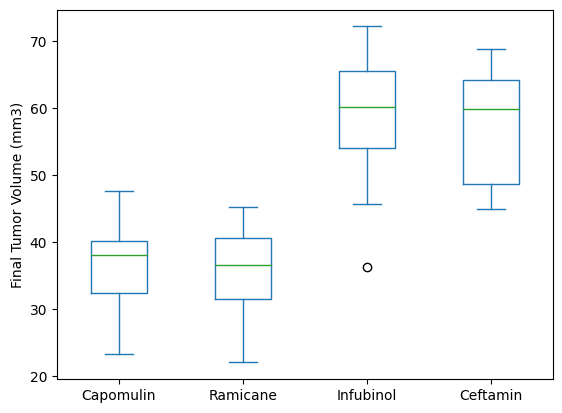

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
cap_df = pd.DataFrame({treatments[0]:tumorData[0]})
cap_df = cap_df.reset_index()
cap_df = cap_df.drop(columns={"index"})
ram_df = pd.DataFrame({"Ramicane":tumorData[1]})
ram_df = ram_df.reset_index()
ram_df =ram_df.drop(columns={"index"})
inf_df = pd.DataFrame({"Infubinol":tumorData[2]})
inf_df = inf_df.reset_index()
inf_df =inf_df.drop(columns={"index"})
cef_df = pd.DataFrame({"Ceftamin":tumorData[3]})
cef_df = cef_df.reset_index()
cef_df =cef_df.drop(columns={"index"})
boxplot = cap_df[[treatments[0]]]
boxplot[treatments[1]] = ram_df[[treatments[1]]]
boxplot[treatments[2]] = inf_df[[treatments[2]]]
boxplot[treatments[3]] = cef_df[[treatments[3]]]



boxplot.plot(kind = "box",ylabel="Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

<Axes: title={'center': 'Capomulin Treatment of Mouse l509'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

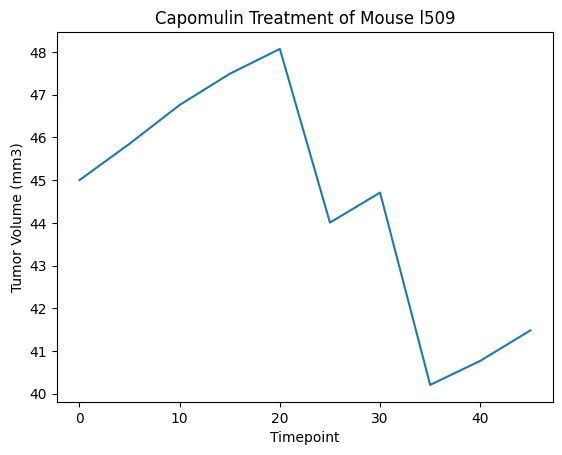

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = cleaned_df.loc[(cleaned_df["Mouse ID"]=="l509")]
line_df.plot(kind="line",x="Timepoint",y="Tumor Volume (mm3)", title="Capomulin Treatment of Mouse l509",ylabel="Tumor Volume (mm3)",legend=False)

Text(0.5, 1.0, 'Weight vs Average Tumor Volume for Capomulin')

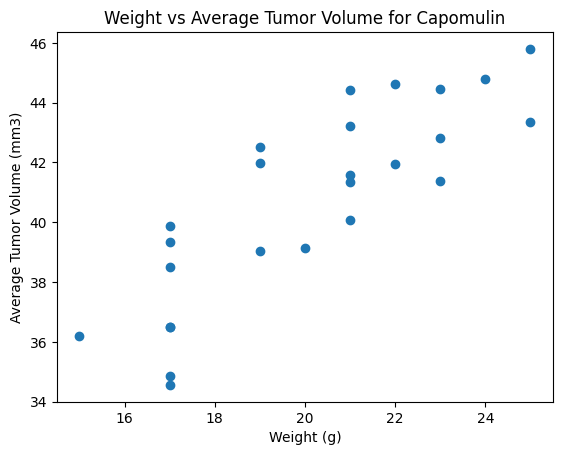

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_df = cleaned_df.loc[(cleaned_df["Drug Regimen"]=="Capomulin")]
scatter_df = scatter_df[["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
scatter_df = scatter_df.groupby(["Mouse ID"]).mean()
x_values = scatter_df["Weight (g)"]
y_values = scatter_df["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume for Capomulin")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


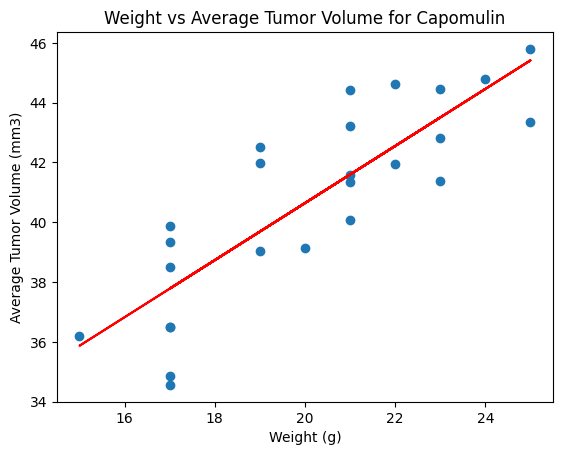

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regressionValues = x_values*slope+intercept
print(f"The correlation between mouse weight and the average tumor volume is {rvalue:.2f}")
plt.scatter(x_values,y_values,)
plt.plot(x_values,regressionValues,color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume for Capomulin")
plt.show()

